# Assignment – High Frequency Words
Authors: Naomi Buell and Richie Rivera

*Please answer the following questions in an IPython Notebook, posted to GitHub.*
1. *Choose a corpus of interest.*
2. *How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).*
3. *Taking the most common words, how many unique words represent half of the total words in the corpus?*
4. *Identify the 200 highest frequency words in this corpus.*
5. *Create a graph that shows the relative frequency of these 200 words.*
6. *Does the observed relative frequency of these words follow Zipf’s law? Explain.*
7. *In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”*

## 1. Choose a corpus of interest.

We chose the *One Piece Transcripts Dataset (Episodes 382–777)*, which can be found here: https://huggingface.co/datasets/mramazan/One-Piece-Transcripts-with-Character-Names-382-777. This dataset contains all dialogue lines from One Piece episodes 382 to 777.

First, we import libraries and load the dataset from online.

In [46]:
# Import packages
from datasets import load_dataset
import nltk
from nltk import word_tokenize
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

# download punkt if it's not found
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading NLTK 'punkt_tab' tokenizer...")
    nltk.download('punkt_tab')

In [50]:
ds = load_dataset("mramazan/One-Piece-Transcripts-with-Character-Names-382-777")

We preview the data below. It has 5 columns: `episode`, `start`, `end`, `character`, and `text`. We will be working with the `text` column, which contains the dialogue lines spoken by characters in the episodes.

In [51]:
# Preview the data
df = ds['train'].to_pandas()
df.head()

,episode,start,end,character,text
0,384,0:02:31.76,0:02:32.73,Narrator,Wealth.
1,384,0:02:32.73,0:02:33.99,Narrator,Fame.
2,384,0:02:33.99,0:02:34.79,Narrator,Power.
3,384,0:02:36.01,0:02:38.75,Narrator,"The man who once owned everything,"
4,384,0:02:38.75,0:02:39.92,Narrator,"The Pirate King,"


We tokenize this `text` column.

In [52]:
# Combine all text into a single string
combined_text = " ".join(df["text"])
tokens = word_tokenize(combined_text)
print(tokens[:10])

['Wealth', '.', 'Fame', '.', 'Power', '.', 'The', 'man', 'who', 'once']


## 2. How many total unique words are in the corpus?

In [53]:
# Remove punctuation and convert to lowercase
unique_words = sorted(
    set(
        word.lower() for word in tokens
        if word.isalpha()
    )
)
print(f"Preview of first 10 unique words: {unique_words[0:10]} ...")
print(f"Number of unique words: {len(unique_words)}.")

Preview of first 10 unique words: ['a', 'aaaah', 'aaah', 'aah', 'aback', 'abalones', 'abandon', 'abandoned', 'abandoning', 'abandons'] ...
Number of unique words: 12438.


There are **12,438** unique words in the corpus (this does not include punctuation, and counts unique words regardless of punctuation).

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [54]:

print(f"The total words in the corpus is: {len(tokens)}, and half of the total words in the corpus is: {len(tokens)/2}.")

# Count frequency of each word in tokens
word_counts = Counter(word.lower() for word in tokens if word.isalpha())

# Define thresholds (number of top words to consider)
thresholds = [183, 184, 185]

for t in thresholds:
    most_common_words = [w for w, _ in word_counts.most_common(t)]
    total_count = sum(word_counts[w] for w in most_common_words)
    print(f"Top {t} words appear {total_count} times in the corpus.")


The total words in the corpus is: 822817, and half of the total words in the corpus is: 411408.5.
Top 183 words appear 410551 times in the corpus.
Top 184 words appear 411044 times in the corpus.
Top 185 words appear 411530 times in the corpus.


**The top 184-185 most common words** represent about half (411,044-411,530 words) of the total words in the corpus (822,817 words). 

## 4. Identify the 200 highest frequency words in this corpus.

We print the 200 highest frequency words below.

In [55]:
print(most_common_words[0:200])

['the', 'you', 'i', 'to', 'it', 'a', 'that', 'of', 'is', 'and', 'we', 'this', 'what', 'do', 'in', 'are', 'he', 'be', 'me', 'for', 'have', 'on', 'so', 'all', 'they', 'was', 'one', 'there', 'my', 'who', 'just', 'with', 'no', 'but', 'if', 'now', 'luffy', 'here', 'your', 'will', 'get', 'as', 'his', 'up', 'can', 'not', 'pirate', 'like', 'out', 'let', 'right', 'him', 'king', 'na', 'from', 'go', 'us', 'world', 'hey', 'pirates', 'them', 'did', 'straw', 'at', 'gon', 'about', 'how', 'has', 'time', 'man', 'too', 'hat', 'by', 'ca', 'then', 'our', 'even', 'way', 'island', 'really', 'going', 'an', 'got', 'were', 'back', 'been', 'new', 'take', 'why', 'oh', 'know', 'their', 'see', 'well', 'down', 'after', 'crew', 'sea', 'where', 'would', 'gomu', 'want', 'could', 'wo', 'come', 'only', 'yeah', 'ace', 'into', 'still', 'piece', 'please', 'guys', 'fruit', 'over', 'stop', 'wait', 'people', 'sure', 'huh', 'should', 'great', 'away', 'law', 'navy', 'make', 'think', 'must', 'when', 'alright', 'any', 'look', 'sh

## 5. Create a graph that shows the relative frequency of these 200 words.

<Axes: xlabel='frequency', ylabel='word'>

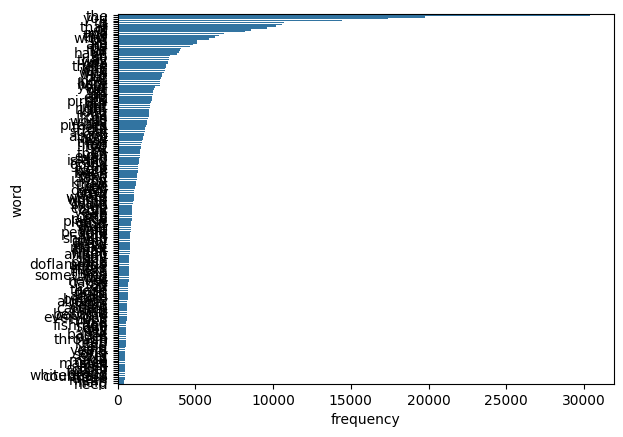

In [56]:
word_frequency_df = pd.DataFrame(word_counts.most_common(200), columns=['word','frequency'])

word_frequency_df

sns.barplot(
    x='frequency',
    y='word',
    data=word_frequency_df
)

The first graph was shown mostly to see how the change in frequency between the top 200 words decreases over time. The first word `the` shows up over 30,000 times while the 10th most common word (`and`) only shows up around 8,000 times.

<Axes: xlabel='frequency', ylabel='word'>

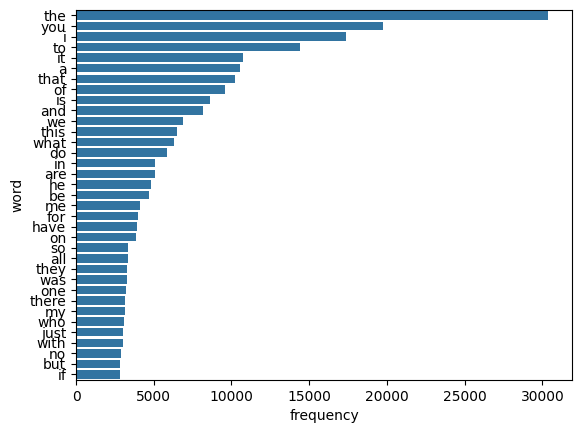

In [57]:
sns.barplot(
    x='frequency',
    y='word',
    data=word_frequency_df.head(35)
)

With stop words such as `the`, `to`, `it`, and etc we can see that the frequency of the words falls off very quickly. This graph would be better viewed as a log:

<Axes: xlabel='log_frequency', ylabel='word'>

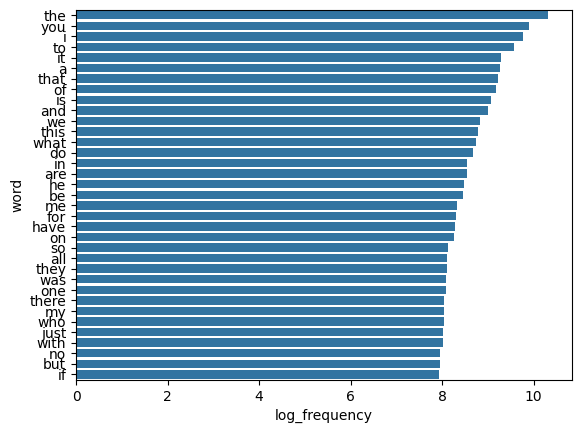

In [61]:
word_frequency_df['log_frequency'] = np.log(word_frequency_df['frequency'])
sns.barplot(
    x='log_frequency',
    y='word',
    data=word_frequency_df.head(35)
)

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”